## Time Series Analysis

### Loading the data and preprocessing 

In [5]:
import pandas as pd
data=pd.read_csv('AirPassengers.csv')
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
data['date']=pd.to_datetime(data['date'])
data=data.set_index('date',inplace=False)
data.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Line/Seasonality Plot

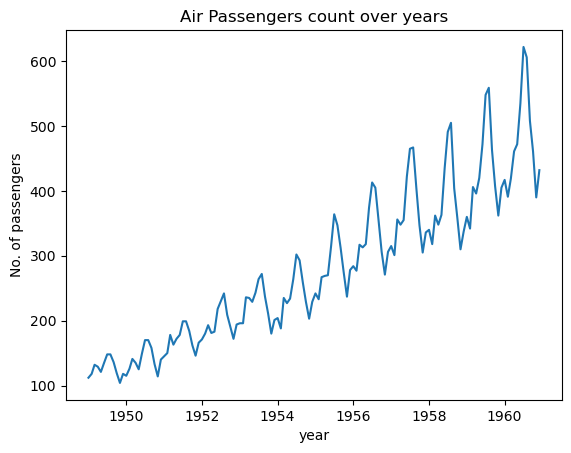

In [7]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.xlabel('year')
plt.ylabel('No. of passengers')
plt.title('Air Passengers count over years')
plt.show(block=False)

### Histogram and Density Plot

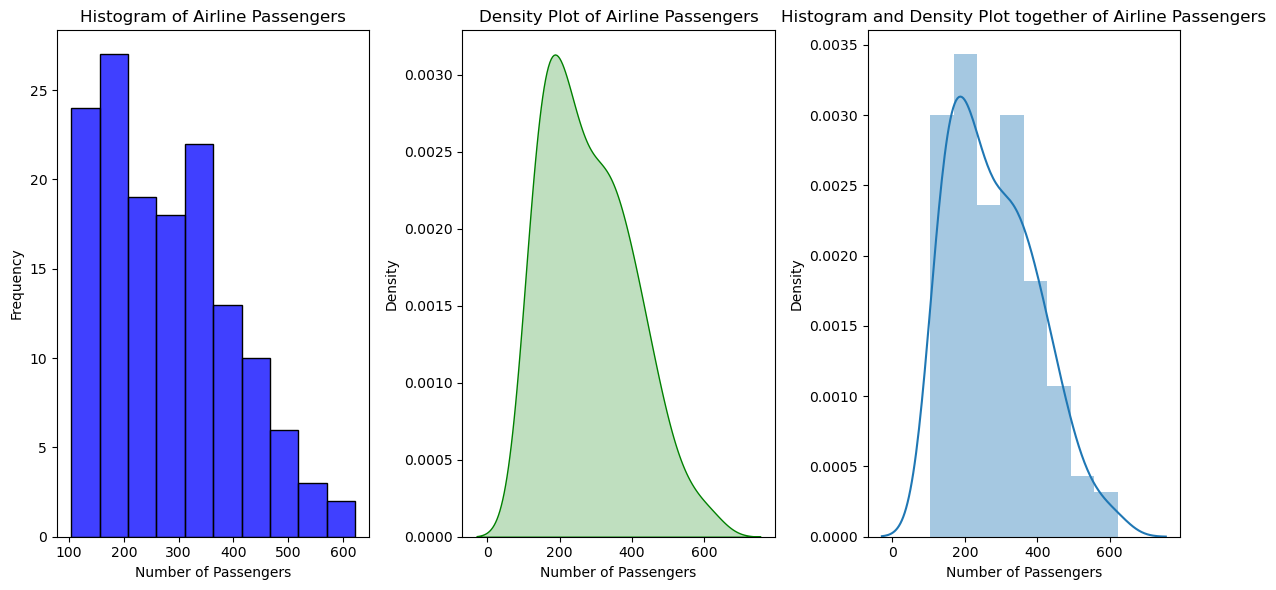

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['value'], kde=False, bins=10, color='blue')
plt.title('Histogram of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.kdeplot(data['value'], fill=True, color='green')
plt.title('Density Plot of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sns.distplot(a=data['value'])
plt.title('Histogram and Density Plot together of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Autocorrelation and Partial Autocorrelation Plots

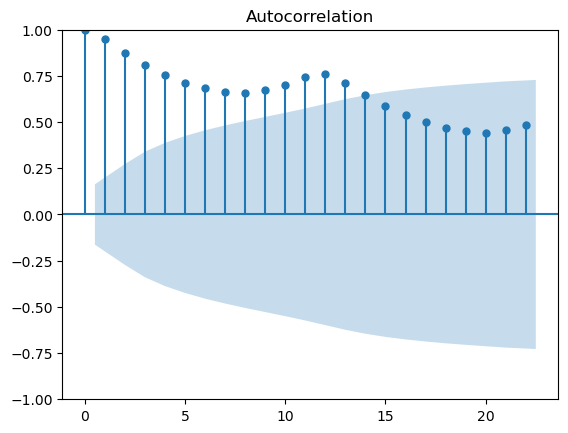

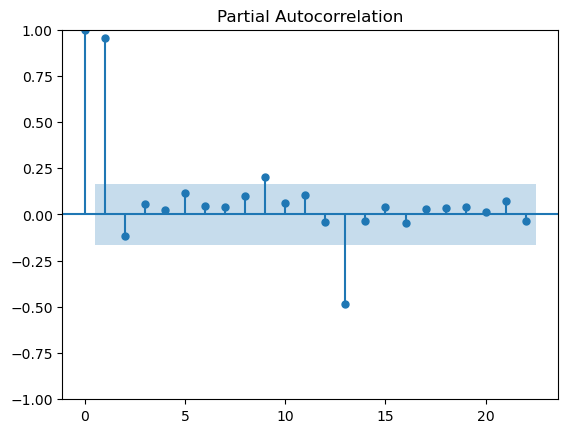

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

data['log']=np.log(data['value'])
plot_acf(data['value'])
plt.show()

plot_pacf(data['log'])
plt.show()

### Additive Decomposition Plot

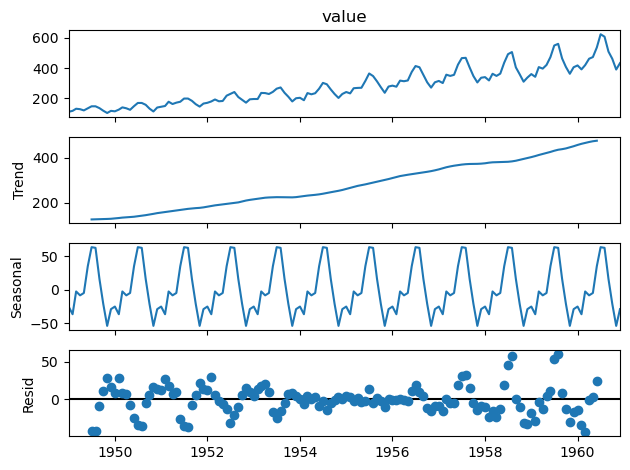

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['value'],model="additive")
decomposition.plot()
plt.show()

### Multiplicative Decomposition Plot

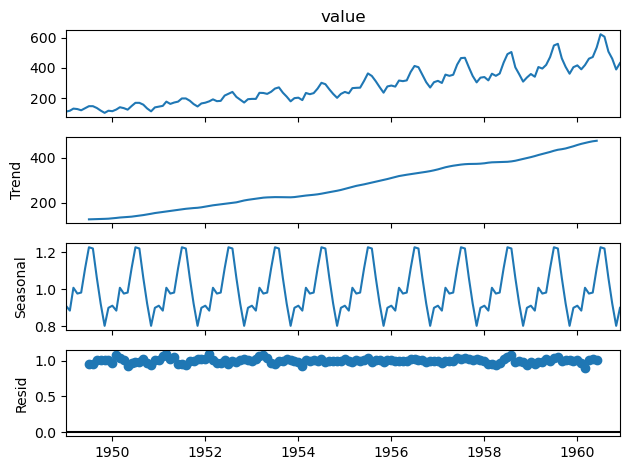

In [17]:
decomposition = seasonal_decompose(data['value'],model="multiplicative")
decomposition.plot()
plt.show()

### Spectral Analysis

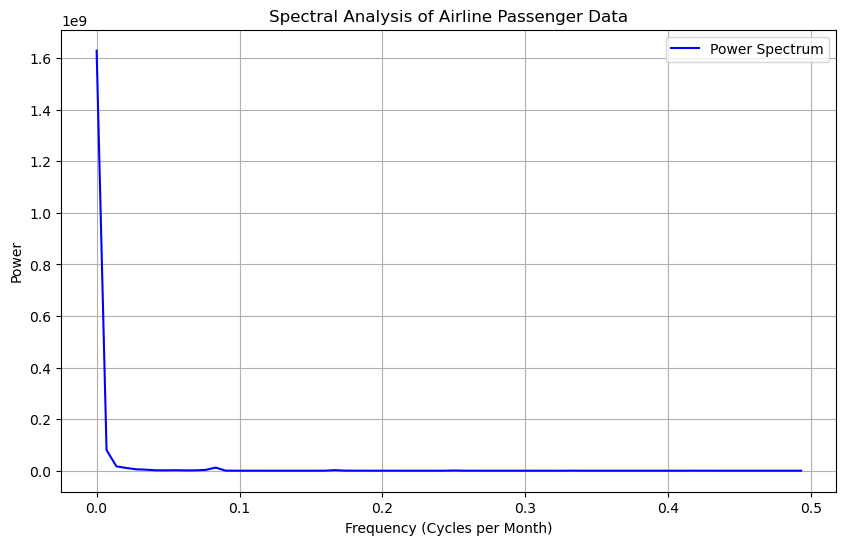

In [21]:
signal = data['value'].values
fft_values = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=1)
power = np.abs(fft_values)**2
plt.figure(figsize=(10, 6))
positive_freqs = freqs[:len(freqs)//2]
positive_power = power[:len(power)//2]
plt.plot(positive_freqs, positive_power, label='Power Spectrum', color='blue')
plt.title('Spectral Analysis of Airline Passenger Data')
plt.xlabel('Frequency (Cycles per Month)')
plt.ylabel('Power')
plt.grid()
plt.legend()
plt.show()

## END